In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from IPython.display import display
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv('Dataset .csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [7]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
order = ['RestaurantID', 'RestaurantName' 'CountryCode', 'City', 'Address', 'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 'Has_Table_booking','Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes', 'Average_Cost_for_two', "Agregate Rating","Rating Text",'Rating color']

In [13]:
order

['RestaurantID',
 'RestaurantNameCountryCode',
 'City',
 'Address',
 'Locality',
 'LocalityVerbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Price_range',
 'Votes',
 'Average_Cost_for_two',
 'Agregate Rating',
 'Rating Text',
 'Rating color']

# Level 1
# Task 1 
## Determine the top three most common cuisines in the dataset.

In [14]:
Total_Cuisines=data.Cuisines.nunique()
Total_Cuisines

1825

In [15]:
Cuisines_count=data.Cuisines.value_counts()
Cuisines_count

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [16]:
Cuisines_Order=Cuisines_count.sort_values(ascending=False)
Cuisines_Order

Cuisines
North Indian                                     936
North Indian, Chinese                            511
Chinese                                          354
Fast Food                                        354
North Indian, Mughlai                            334
                                                ... 
Cafe, Mexican, Italian, North Indian, Chinese      1
Continental, Mexican                               1
Continental, Chinese, Italian, Cafe                1
Hyderabadi, Biryani                                1
Italian, World Cuisine                             1
Name: count, Length: 1825, dtype: int64

In [17]:
Top_Three_Cuisines=Cuisines_Order.head(3)
Top_Three_Cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

# Task.1  
## Calculate the percentage of restaurants that serve each of the top cuisines.

In [18]:
Total_Restrarants=data['Restaurant Name'].count()
Total_Restrarants

9551

In [19]:
Total_Restrarants_counts=data['Restaurant Name'].value_counts()
Total_Restrarants_counts

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [20]:
def  calculate_percentage(Top_Cuisines):
    Total_Restrarants=data['Restaurant Name'].count()
    percentages={}
    
    for Cuisines,count in Top_Cuisines.items():
        percentage=(count/Total_Restrarants)*100
        percentages[Cuisines]= percentage
        
    return percentages 
    
Top_Cuisines={"North Indian":936,"North Indian,Chinese":511,"Chinese":354}

p=calculate_percentage(Top_Cuisines)

for Cuisines,percentage in p.items():
    print(f"{Cuisines}:{percentage:.2f}%")

North Indian:9.80%
North Indian,Chinese:5.35%
Chinese:3.71%


# Level 1
## Task 2
# Identify the city with the highest number of restaurants in the dataset.

In [21]:
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [22]:

Total_Restrarants=data['Restaurant Name'].count()
Total_Restrarants

9551

In [23]:
Total_City=data["City"].nunique()
Total_City

141

In [24]:
Top_city=data.groupby('City')["Restaurant Name"].count().sort_values(ascending=False)
Top_city

City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Name: Restaurant Name, Length: 141, dtype: int64

In [25]:
Top_City=Top_city.head(1)
Top_City

City
New Delhi    5473
Name: Restaurant Name, dtype: int64

Conclusion:-The City New Delhi has highest that is 5473 numbers of restarants.

# Calculate the average rating for restaurants in each city.

In [26]:
Rating=data["Aggregate rating"]
Rating

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [27]:
Average_Rating=data.groupby("City")["Aggregate rating"].mean()
Average_Rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

Conclusion:- The Average rating of city Abu Dhabi is 4.3, Agra is 3.96 etc

# Determine the city with the highest average rating.

In [28]:
Average_Rating=data.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)
Average_Rating

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

In [29]:
Average_Rating.head(1)

City
Inner City    4.9
Name: Aggregate rating, dtype: float64

# Task 3

# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

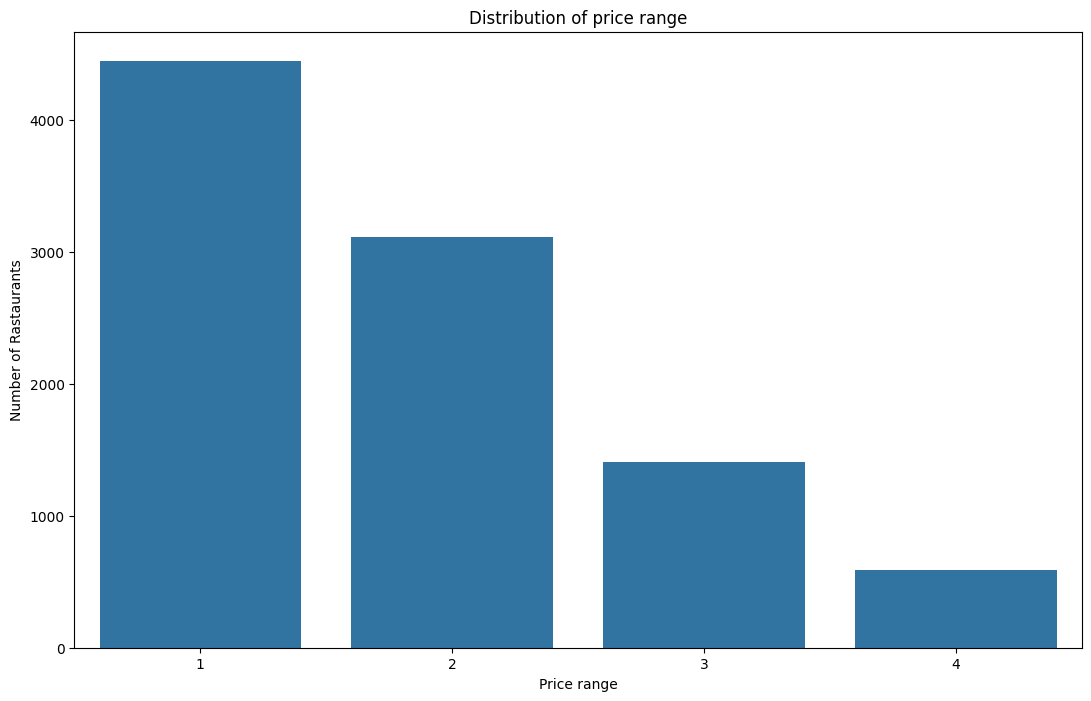

In [30]:
plt.figure(figsize=(13,8))
ax=sns.countplot(x="Price range",data=data)
plt.xlabel("Price range")
plt.ylabel("Number of Rastaurants")
plt.title("Distribution of price range")
plt.show()



# Calculate the percentage of restaurants in each price range category.

In [31]:
Total_Restrarants=data['Restaurant Name'].count()
Total_Restrarants

9551

In [32]:
price_range=data["Price range"].value_counts()
price_range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [33]:
percentage=(price_range/Total_Restrarants)*100

In [34]:
for price_range,percentage in percentage.items():
    print(f"{price_range}:{percentage:.2f}%")

1:46.53%
2:32.59%
3:14.74%
4:6.14%


# Task 4
Determine the percentage of restaurants that offer online delivery

In [35]:
data['Has Online delivery'] = np.where(data['Has Online delivery']==("Yes"), 1, 0)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,0,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,0,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,0,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,0,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,0,No,No,4,4.0,Green,Very Good,901


In [36]:
Total_Restrarants=data['Restaurant Name'].count()
Total_Restrarants

9551

In [37]:
online_delivary=data['Has Online delivery'].value_counts()
online_delivary


Has Online delivery
0    7100
1    2451
Name: count, dtype: int64

In [38]:
percentage=(online_delivary/Total_Restrarants)*100
percentage
for online_delivery,percentage in percentage.items():
    print(f"{online_delivery}:{percentage:.2f}%")

0:74.34%
1:25.66%


Conclusion:- There are only 25.66% Restarunts offer online delivery

# Compare the average ratings of restaurants with and without online delivery

In [39]:
def compare_average_ratingg(online_delivery):
     avg_rating_with_online_delivery=data[data['Has Online delivery']==1]["Aggregate rating"].mean()
     avg_rating_without_online_delivery=data[data['Has Online delivery']==0]["Aggregate rating"].mean()
     return avg_rating_with_online_delivery,avg_rating_without_online_delivery
online_delivery = data['Has Online delivery']
avg_rating_with_online_delivery,avg_rating_without_online_delivery=compare_average_ratingg(online_delivery)


In [40]:
avg_rating_with_online_delivery

3.2488372093023257

In [41]:
avg_rating_without_online_delivery

2.465295774647887

In [42]:
compare_average_ratingg(online_delivery)

(3.2488372093023257, 2.465295774647887)

# Level 2
# Task 1 
# Analyze the distribution of aggregate ratings and determine the most common rating range.

In [43]:
data["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [44]:
data["Aggregate rating"].mode()

0    0.0
Name: Aggregate rating, dtype: float64

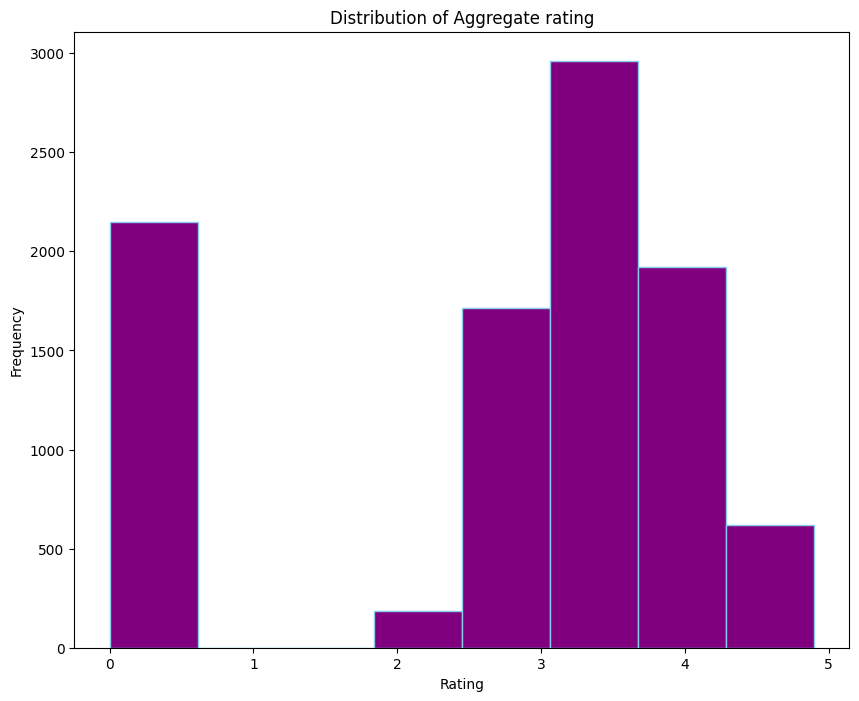

The most common rating range:0.0


In [45]:
def distribution_of_agg_rating(dataset):
    plt.figure(figsize=(10,8))
    plt.hist(data["Aggregate rating"],bins=8,edgecolor="Skyblue",color="purple")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.title("Distribution of Aggregate rating")
    plt.show()

    most_common_range=data["Aggregate rating"].mode()[0]
    return most_common_range

dataset=data["Aggregate rating"]
most_common_range=distribution_of_agg_rating(dataset)

print(f"The most common rating range:{most_common_range}")

    
    


# Calculate the average number of votes received by restaurants

In [46]:
data["Votes"].mean()

156.909747670401

In [47]:
def calculate_average_votes(dataset):
    Average_votes=data["Votes"].mean()
    return Average_votes
dataset=data["Votes"]
Average_votes=calculate_average_votes(dataset)
print(f"The average number of votes received by restaurants:{Average_votes:.2f}")

The average number of votes received by restaurants:156.91


# Level 2
## Task 2
## Identify the most common combinations of cuisines in the dataset.

In [48]:
Cuisines=data['Cuisines'].value_counts()
Cuisines

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [49]:
most_common_cuisines=Cuisines.head(10)
most_common_cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

# Determine if certain cuisine combinations tend to have higher ratings.

In [50]:
Cuisines=data.groupby('Cuisines')["Aggregate rating"].max().sort_values(ascending=False)
Cuisines

Cuisines
Brazilian, Bar Food                    4.9
American, Sandwich, Tea                4.9
European, German                       4.9
Chinese                                4.9
North Indian, South Indian, Mughlai    4.9
                                      ... 
Lebanese, North Indian, Fast Food      0.0
Lucknowi, Mughlai, North Indian        0.0
North Indian, Mughlai, Armenian        0.0
South Indian, Chinese, Continental     0.0
Cafe, Tibetan                          0.0
Name: Aggregate rating, Length: 1825, dtype: float64

In [51]:
Top_cuisines_combination=Cuisines.head(10)

In [52]:
Top_cuisines_combination

Cuisines
Brazilian, Bar Food                    4.9
American, Sandwich, Tea                4.9
European, German                       4.9
Chinese                                4.9
North Indian, South Indian, Mughlai    4.9
European, Contemporary                 4.9
Burger                                 4.9
Indian, North Indian                   4.9
European, Asian, Indian                4.9
Mexican, American, Healthy Food        4.9
Name: Aggregate rating, dtype: float64

# Task 3

# Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [53]:
! pip install folium

In [54]:
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,0,No,No,3,4.8,Dark Green,Excellent,314


In [55]:
restrarunt_name=data["Restaurant Name"]
latitude=data["Latitude"]
longitude=data["Longitude"]

In [56]:
x=data[["Longitude","Latitude"]]
nclusters=5

In [57]:
kmean=KMeans(n_clusters=nclusters,random_state=42)
data["cluster"]=kmean.fit_predict(x)

In [58]:
map_center=[latitude.mean(),longitude.mean()]
map=folium.Map(location=map_center,zoom_starts=12)

In [59]:
for index, row in data.iterrows():
    restrarunt_name=row["Restaurant Name"]
    latitude=row["Latitude"]
    longitude=row["Longitude"]
    cuisines=row["Cuisines"]
    rating=row["Aggregate rating"]
    cluster=row["cluster"]
    

In [60]:
Popup_text=f"Restarunt:{restrarunt_name}\nCuisine:{cuisines}\nrating:{rating}"

In [61]:
marker=folium.Marker([latitude,longitude],popup=Popup_text)

In [62]:
marker.add_to(map)

In [63]:
display(map)

# Task 4

# Identify if there are any restaurant chains present in the dataset

In [64]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,cluster
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,0,No,No,3,4.8,Dark Green,Excellent,314,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,0,No,No,3,4.5,Dark Green,Excellent,591,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,0,No,No,4,4.4,Green,Very Good,270,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,0,No,No,4,4.9,Dark Green,Excellent,365,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,0,No,No,4,4.8,Dark Green,Excellent,229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,0,No,No,3,4.1,Green,Very Good,788,4
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,0,No,No,3,4.2,Green,Very Good,1034,4
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,0,No,No,4,3.7,Yellow,Good,661,4
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,0,No,No,4,4.0,Green,Very Good,901,4


In [65]:
chain_count=data[["Restaurant Name"]].value_counts()
restaurant_chain=chain_count[chain_count>1]
print("restaurant_chain")
restaurant_chain


restaurant_chain


Restaurant Name 
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Metro Fast Food      2
Midnight Hunger      2
Made In Punjab       2
Bakingo              2
Metro Dhaba          2
Name: count, Length: 734, dtype: int64

# Analyze the ratings and popularity of different restaurant chains.

In [66]:
chain_stats=data.groupby("Restaurant Name").agg({"Aggregate rating":"mean","Votes":"sum"})


In [67]:
chain_stats=chain_stats.sort_values(by="Aggregate rating" ,ascending=False)
Top_chains=chain_stats.head(10)
print("Top 10 Restaurant chains:")
Top_chains

Top 10 Restaurant chains:


,Aggregate rating,Votes
Restaurant Name,,
Restaurant Mosaic @ The Orient,4.9,85
Ministry of Crab,4.9,203
Miann,4.9,281
Shorts Burger and Shine,4.9,820
Milse,4.9,754
Yellow Dog Eats,4.9,1252
Duck & Waffle,4.9,706
Gaga Manjero,4.9,95
Mirchi And Mime,4.9,3244


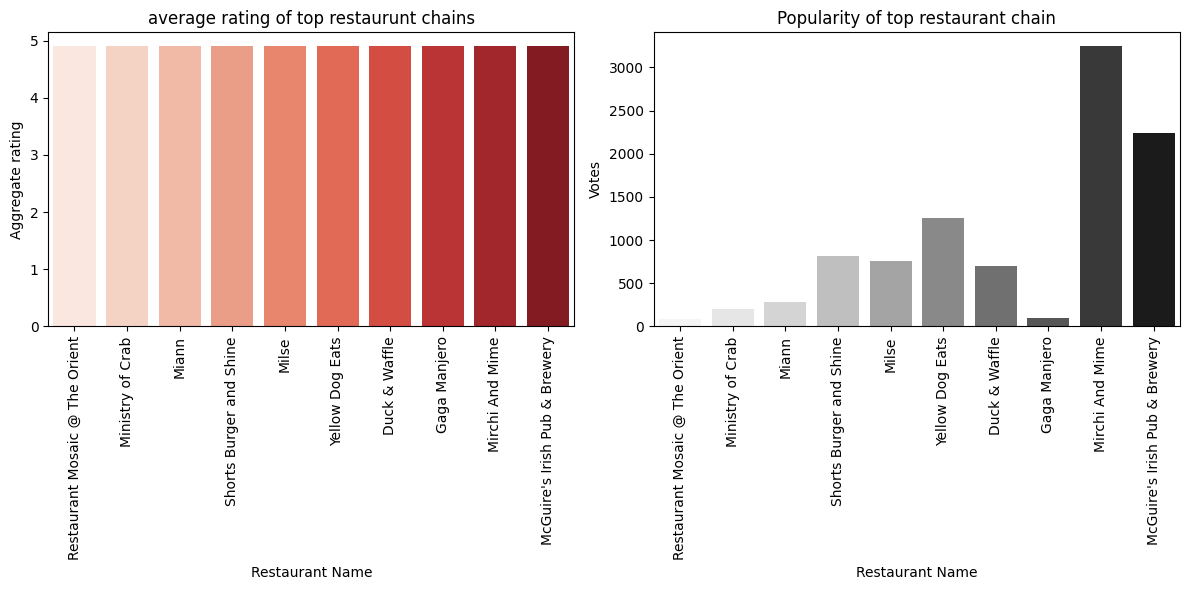

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=Top_chains.index,y=Top_chains["Aggregate rating"],palette="Reds")
plt.xticks(rotation=90)
plt.title("average rating of top restaurunt chains")
plt.subplot(1,2,2)
sns.barplot(x=Top_chains.index,y=Top_chains["Votes"],palette="Greys")
plt.xticks(rotation=90)
plt.title("Popularity of top restaurant chain")
plt.tight_layout()
plt.show()